# SI 618 - Final Project Notebook
### Authors: Fiona Fox, Bella Karduck, Theodora Vorias

This notebook contains all of the code used to collect, clean and manipulate, analyze, and visualize the data for our final project from two sources: a Kaggle dataset and data pulled from Spotify's API, Spotipy.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import json
!pip install spotipy
import spotipy
from tqdm import tqdm
from time import sleep
!pip install --default-timeout=100 future
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from apikeys import apiInfo
from apikeys import apiInfo2


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [39]:
# Getting rid of warning messages
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [40]:
def open_cache(filename):
    ''' opens the cache file if it exists and loads the JSON into
    a dictionary, which it then returns.
    if the cache file doesn't exist, creates a new cache dictionary
    Parameters
    ----------
    None
    Returns
    -------
    The opened cache
    '''

    try:
        cache_file = open(filename, 'r')
        cache_contents = cache_file.read()
        cacheDict = json.loads(cache_contents)
        cache_file.close()
    except:
        cacheDict = {}
    return cacheDict

def save_cache(cache_dict, filename):
    ''' saves the current state of the cache to disk
    Parameters
    ----------
    cache_dict: dict
        The dictionary to save
    Returns
    -------
    None
    '''
    dumped_json_cache = json.dumps(cache_dict)
    cache_file = open(filename,"w")
    cache_file.write(dumped_json_cache)
    cache_file.close() 

In [41]:
# Load Kaggle dataset. Found here: https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs
spotify_kaggle = pd.read_csv('Spotify_final_dataset.csv')

In [42]:
spotify_kaggle.head()

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0            302.0              1                  (x29)       2118242   
1            178.0              1                  (x20)       2127668   
2            212.0              1                   (x4)       1660502   
3              6.0              7                      0        659366   
4            186.0              1                 (x124)       2905678   

   Total Streams  
0      883369738  
1      864832399  
2      781153024  
3      734857487  
4      718865961

### Making a call to the Spotipy API

Because the number of songs available through the Spotipy API and in the Spotify Kaggle dataset is so large, we will only be requesting data on the top 5,000 songs found in the Kaggle dataset. It takes a very long time to receive the requested data back from the API, so we have previously cached the data in a json file. Throughout this notebook, we will use the cached data. However, the code below is what was used to make the original request. 

In [43]:
song_list = {}
SP = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=apiInfo['client_id'],
client_secret=apiInfo['client_secret']))
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=apiInfo2['client_id'],
client_secret=apiInfo2['client_secret']))

In [44]:
def get_names(artist, song):
    trackIDs = []
    for i in tqdm(range(len(song))):
        searchQuery = artist[i] + ' ' + song[i]
        searchResults = bellaSP.search(q=searchQuery)
        track = searchResults['tracks']['items'][0]['uri']
        trackIDs.append(track)
    return trackIDs

In [45]:
# song_names = spotify_kaggle['Song Name']
# artist_names = spotify_kaggle['Artist Name']
# trackIDs = get_names(artist_names[:5000], song_names[:5000])
#save_cache(trackIDs, 'trackIDs.json')

In [46]:
# Example using 1 song to show that the code works
song_names = spotify_kaggle['Song Name']
artist_names = spotify_kaggle['Artist Name']
trackIDs_test = get_names(artist_names[:1], song_names[:1])
trackIDs_test

100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


['spotify:track:3KkXRkHbMCARz0aVfEt68P']

## Data Cleaning and Manipulation

In [47]:
with open('songlist.json','r') as f:
    spotify_api = json.loads(f.read())

In [48]:
# Creating dataframe from API data

playlist_features_list = ["danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
features_df = pd.DataFrame(columns = playlist_features_list)
features_df

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature]
Index: []

In [49]:
for (k, v) in spotify_api.items():
    features_df = features_df.append(v)

In [50]:
features_df.head()

danceability  energy key  loudness mode  speechiness instrumentalness  \
0         0.755   0.522   2    -4.368    1       0.0575                0   
0         0.511   0.566   6    -7.230    0       0.2000                0   
0         0.732   0.750  11    -6.366    0       0.2310                0   
0         0.690   0.521  10    -8.492    0       0.3390                0   
0         0.585   0.520   5    -6.136    0       0.0712          0.00007   

   liveness  valence    tempo duration_ms time_signature  acousticness  \
0    0.0685    0.925   89.960      157560              4       0.53300   
0    0.3400    0.218   83.903      239836              4       0.34900   
0    0.1090    0.401  155.096      182707              4       0.00264   
0    0.0534    0.494  100.028      292799              4       0.32400   
0    0.1310    0.129  159.801      218147              4       0.12400   

             type                      id  \
0  audio_features  0RiRZpuVRbi7oqRdSMwhQY   
0  audio_features  285pBltuF7vW8TeWk8hdRR   
0  audio_features  7GX5flRQZVHRAGd6B4TmDO   
0  audio_features  68Dni7IE4VyPkTOH9mRWHr   
0  audio_features  0e7ipj03S05BNilyu5bRzt   

                                    uri  \
0  spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
0  spotify:track:285pBltuF7vW8TeWk8hdRR   
0  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
0  spotify:track:68Dni7IE4VyPkTOH9mRWHr   
0  spotify:track:0e7ipj03S05BNilyu5bRzt   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
0  https://api.spotify.com/v1/tracks/285pBltuF7vW...   
0  https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
0  https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
0  https://api.spotify.com/v1/tracks/0e7ipj03S05B...   

                                        analysis_url    0  
0  https://api.spotify.com/v1/audio-analysis/0RiR...  NaN  
0  https://api.spotify.com/v1/audio-analysis/285p...  NaN  
0  https://api.spotify.com/v1/audio-analysis/7GX5...  NaN  
0  https://api.spotify.com/v1/audio-analysis/68Dn...  NaN  
0  https://api.spotify.com/v1/audio-analysis/0e7i...  NaN

In [51]:
features_df.reset_index(inplace=True)
features_df.head()

index  danceability  energy key  loudness mode  speechiness  \
0      0         0.755   0.522   2    -4.368    1       0.0575   
1      0         0.511   0.566   6    -7.230    0       0.2000   
2      0         0.732   0.750  11    -6.366    0       0.2310   
3      0         0.690   0.521  10    -8.492    0       0.3390   
4      0         0.585   0.520   5    -6.136    0       0.0712   

  instrumentalness  liveness  valence    tempo duration_ms time_signature  \
0                0    0.0685    0.925   89.960      157560              4   
1                0    0.3400    0.218   83.903      239836              4   
2                0    0.1090    0.401  155.096      182707              4   
3                0    0.0534    0.494  100.028      292799              4   
4          0.00007    0.1310    0.129  159.801      218147              4   

   acousticness            type                      id  \
0       0.53300  audio_features  0RiRZpuVRbi7oqRdSMwhQY   
1       0.34900  audio_features  285pBltuF7vW8TeWk8hdRR   
2       0.00264  audio_features  7GX5flRQZVHRAGd6B4TmDO   
3       0.32400  audio_features  68Dni7IE4VyPkTOH9mRWHr   
4       0.12400  audio_features  0e7ipj03S05BNilyu5bRzt   

                                    uri  \
0  spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1  spotify:track:285pBltuF7vW8TeWk8hdRR   
2  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3  spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4  spotify:track:0e7ipj03S05BNilyu5bRzt   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1  https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2  https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3  https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4  https://api.spotify.com/v1/tracks/0e7ipj03S05B...   

                                        analysis_url    0  
0  https://api.spotify.com/v1/audio-analysis/0RiR...  NaN  
1  https://api.spotify.com/v1/audio-analysis/285p...  NaN  
2  https://api.spotify.com/v1/audio-analysis/7GX5...  NaN  
3  https://api.spotify.com/v1/audio-analysis/68Dn...  NaN  
4  https://api.spotify.com/v1/audio-analysis/0e7i...  NaN

In [52]:
features_df.reset_index(inplace=True)
features_df.drop(columns=[0], inplace=True)
features_df

level_0  index  danceability  energy key  loudness mode  speechiness  \
0           0      0         0.755   0.522   2    -4.368    1       0.0575   
1           1      0         0.511   0.566   6    -7.230    0       0.2000   
2           2      0         0.732   0.750  11    -6.366    0       0.2310   
3           3      0         0.690   0.521  10    -8.492    0       0.3390   
4           4      0         0.585   0.520   5    -6.136    0       0.0712   
...       ...    ...           ...     ...  ..       ...  ...          ...   
4881     4881      0         0.640   0.519   1    -6.757    0       0.1880   
4882     4882      0         0.235   0.660   7    -6.134    1       0.0491   
4883     4883      0         0.814   0.743   9    -2.968    1       0.1590   
4884     4884      0         0.359   0.497   0    -6.244    1       0.0288   
4885     4885      0         0.874   0.552   1    -7.951    1       0.2710   

     instrumentalness  liveness  valence    tempo duration_ms time_signature  \
0                   0    0.0685    0.925   89.960      157560              4   
1                   0    0.3400    0.218   83.903      239836              4   
2                   0    0.1090    0.401  155.096      182707              4   
3                   0    0.0534    0.494  100.028      292799              4   
4             0.00007    0.1310    0.129  159.801      218147              4   
...               ...       ...      ...      ...         ...            ...   
4881                0    0.0883    0.252  103.359      143493              4   
4882                0    0.1590    0.144   64.210      216960              4   
4883                0    0.1630    0.367  107.996      214587              4   
4884                0    0.1050    0.169   99.186      206067              3   
4885            0.286    0.1440    0.521  147.043      238027              4   

      acousticness            type                      id  \
0         0.533000  audio_features  0RiRZpuVRbi7oqRdSMwhQY   
1         0.349000  audio_features  285pBltuF7vW8TeWk8hdRR   
2         0.002640  audio_features  7GX5flRQZVHRAGd6B4TmDO   
3         0.324000  audio_features  68Dni7IE4VyPkTOH9mRWHr   
4         0.124000  audio_features  0e7ipj03S05BNilyu5bRzt   
...            ...             ...                     ...   
4881      0.250000  audio_features  4Qxn47gWPSucovKrMyRf1z   
4882      0.012200  audio_features  7p9zIciejn8GXnsRdG9EQR   
4883      0.152000  audio_features  0nhVrTiCGiGRCoZOJiWzm1   
4884      0.637000  audio_features  0viGbbEJ9xV6qNJsTaXruz   
4885      0.000786  audio_features  0zNHMc1cGKe4MO5rtGtKRh   

                                       uri  \
0     spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1     spotify:track:285pBltuF7vW8TeWk8hdRR   
2     spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3     spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4     spotify:track:0e7ipj03S05BNilyu5bRzt   
...                                    ...   
4881  spotify:track:4Qxn47gWPSucovKrMyRf1z   
4882  spotify:track:7p9zIciejn8GXnsRdG9EQR   
4883  spotify:track:0nhVrTiCGiGRCoZOJiWzm1   
4884  spotify:track:0viGbbEJ9xV6qNJsTaXruz   
4885  spotify:track:0zNHMc1cGKe4MO5rtGtKRh   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1     https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2     https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3     https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4     https://api.spotify.com/v1/tracks/0e7ipj03S05B...   
...                                                 ...   
4881  https://api.spotify.com/v1/tracks/4Qxn47gWPSuc...   
4882  https://api.spotify.com/v1/tracks/7p9zIciejn8G...   
4883  https://api.spotify.com/v1/tracks/0nhVrTiCGiGR...   
4884  https://api.spotify.com/v1/tracks/0viGbbEJ9xV6...   
4885  https://api.spotify.com/v1/tracks/0zNHMc1cGKe4...   

                                           analysis_url  
0     https://api.spotify.com/v1/audio-anal

In [53]:
spotify_kaggle = spotify_kaggle[:4886]
spotify_kaggle.reset_index(inplace=True)
spotify_kaggle.reset_index(inplace=True)
spotify_kaggle.head()

level_0  index  Position    Artist Name  \
0        0      0         1   Post Malone    
1        1      1         2    Juice WRLD    
2        2      2         3  Lil Uzi Vert    
3        3      3         4       J. Cole    
4        4      4         5   Post Malone    

                                    Song Name  Days  Top 10 (xTimes)  \
0  Sunflower  SpiderMan: Into the SpiderVerse  1506            302.0   
1                                Lucid Dreams  1673            178.0   
2                               XO TOUR Llif3  1853            212.0   
3                              No Role Modelz  2547              6.0   
4                                    rockstar  1223            186.0   

   Peak Position Peak Position (xTimes)  Peak Streams  Total Streams  
0              1                  (x29)       2118242      883369738  
1              1                  (x20)       2127668      864832399  
2              1                   (x4)       1660502      781153024  
3              7                      0        659366      734857487  
4              1                 (x124)       2905678      718865961

In [54]:
# Creating a combined dataframe of the Kaggle and API data
combined = pd.merge(spotify_kaggle, features_df, on='level_0', how='outer')
combined.head()

level_0  index_x  Position    Artist Name  \
0        0        0         1   Post Malone    
1        1        1         2    Juice WRLD    
2        2        2         3  Lil Uzi Vert    
3        3        3         4       J. Cole    
4        4        4         5   Post Malone    

                                    Song Name  Days  Top 10 (xTimes)  \
0  Sunflower  SpiderMan: Into the SpiderVerse  1506            302.0   
1                                Lucid Dreams  1673            178.0   
2                               XO TOUR Llif3  1853            212.0   
3                              No Role Modelz  2547              6.0   
4                                    rockstar  1223            186.0   

   Peak Position Peak Position (xTimes)  Peak Streams  ...  valence    tempo  \
0              1                  (x29)       2118242  ...    0.925   89.960   
1              1                  (x20)       2127668  ...    0.218   83.903   
2              1                   (x4)       1660502  ...    0.401  155.096   
3              7                      0        659366  ...    0.494  100.028   
4              1                 (x124)       2905678  ...    0.129  159.801   

   duration_ms  time_signature acousticness            type  \
0       157560               4      0.53300  audio_features   
1       239836               4      0.34900  audio_features   
2       182707               4      0.00264  audio_features   
3       292799               4      0.32400  audio_features   
4       218147               4      0.12400  audio_features   

                       id                                   uri  \
0  0RiRZpuVRbi7oqRdSMwhQY  spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1  285pBltuF7vW8TeWk8hdRR  spotify:track:285pBltuF7vW8TeWk8hdRR   
2  7GX5flRQZVHRAGd6B4TmDO  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3  68Dni7IE4VyPkTOH9mRWHr  spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4  0e7ipj03S05BNilyu5bRzt  spotify:track:0e7ipj03S05BNilyu5bRzt   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1  https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2  https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3  https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4  https://api.spotify.com/v1/tracks/0e7ipj03S05B...   

                                        analysis_url  
0  https://api.spotify.com/v1/audio-analysis/0RiR...  
1  https://api.spotify.com/v1/audio-analysis/285p...  
2  https://api.spotify.com/v1/audio-analysis/7GX5...  
3  https://api.spotify.com/v1/audio-analysis/68Dn...  
4  https://api.spotify.com/v1/audio-analysis/0e7i...  

[5 rows x 30 columns]

In [55]:
combined.loc[combined[combined.isnull().any(axis=1 )].index].index[0]
# how to drop a row
combined.drop(combined.loc[combined[combined.isnull().any(axis=1 )].index].index[0], inplace=True)
combined['duration_ms'] = combined['duration_ms'].astype(float)

In [56]:
combined.isnull().sum()

level_0                   0
index_x                   0
Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
index_y                   0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
duration_ms               0
time_signature            0
acousticness              0
type                      0
id                        0
uri                       0
track_href                0
analysis_url              0
dtype: int64

In [57]:
combined.describe()

level_0      index_x     Position         Days  Top 10 (xTimes)  \
count  4885.000000  4885.000000  4885.000000  4885.000000      4885.000000   
mean   2442.756192  2442.756192  2443.756192   116.832344         6.155169   
std    1410.641755  1410.641755  1410.641755   176.014076        23.051061   
min       0.000000     0.000000     1.000000     3.000000         0.000000   
25%    1222.000000  1222.000000  1223.000000    19.000000         0.000000   
50%    2443.000000  2443.000000  2444.000000    51.000000         0.000000   
75%    3664.000000  3664.000000  3665.000000   139.000000         1.000000   
max    4885.000000  4885.000000  4886.000000  2547.000000       302.000000   

       Peak Position  Peak Streams  Total Streams  index_y  danceability  \
count    4885.000000  4.885000e+03   4.885000e+03   4885.0   4885.000000   
mean       39.049130  8.808490e+05   4.061430e+07      0.0      0.673738   
std        37.347967  8.224488e+05   7.274111e+07      0.0      0.149564   
min         1.000000  6.226300e+04   2.429923e+06      0.0      0.143000   
25%        10.000000  3.664810e+05   5.565868e+06      0.0      0.578000   
50%        26.000000  6.198150e+05   1.393889e+07      0.0      0.688000   
75%        56.000000  1.063342e+06   4.056684e+07      0.0      0.783000   
max       184.000000  7.786096e+06   8.833697e+08      0.0      0.980000   

            energy     loudness  speechiness     liveness      valence  \
count  4885.000000  4885.000000  4885.000000  4885.000000  4885.000000   
mean      0.615587    -6.744446     0.136262     0.181053     0.457225   
std       0.168732     2.656529     0.125912     0.134263     0.219697   
min       0.021800   -34.475000     0.023200     0.021500     0.032000   
25%       0.513000    -7.916000     0.044100     0.099600     0.284000   
50%       0.627000    -6.335000     0.079000     0.126000     0.447000   
75%       0.736000    -5.036000     0.201000     0.221000     0.619000   
max       0.982000     0.175000     0.966000     0.970000     0.979000   

             tempo    duration_ms  acousticness  
count  4885.000000    4885.000000   4885.000000  
mean    121.804605  206662.146981      0.224788  
std      29.508592   51420.407823      0.251452  
min      40.319000   30133.000000      0.000008  
25%      97.672000  176293.000000      0.033000  
50%     120.970000  203367.000000      0.121000  
75%     142.893000  230881.000000      0.336000  
max     209.763000  690732.000000      0.994000

## Data Analysis

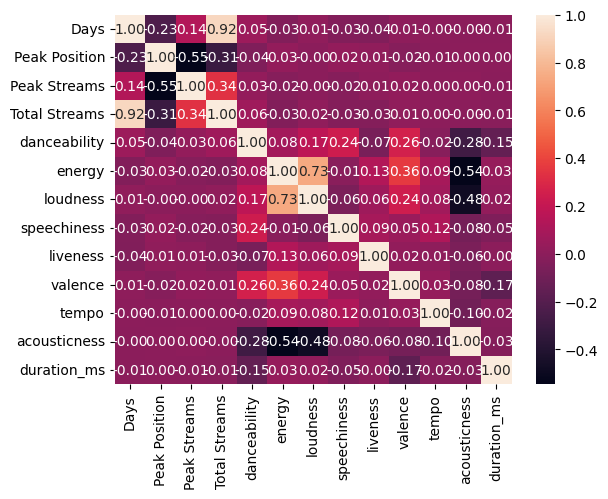

In [58]:
corr = combined[['Days', 'Peak Position', 'Peak Streams', 'Total Streams','danceability','energy','loudness','speechiness','liveness',
                   'valence','tempo','acousticness', 'duration_ms']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

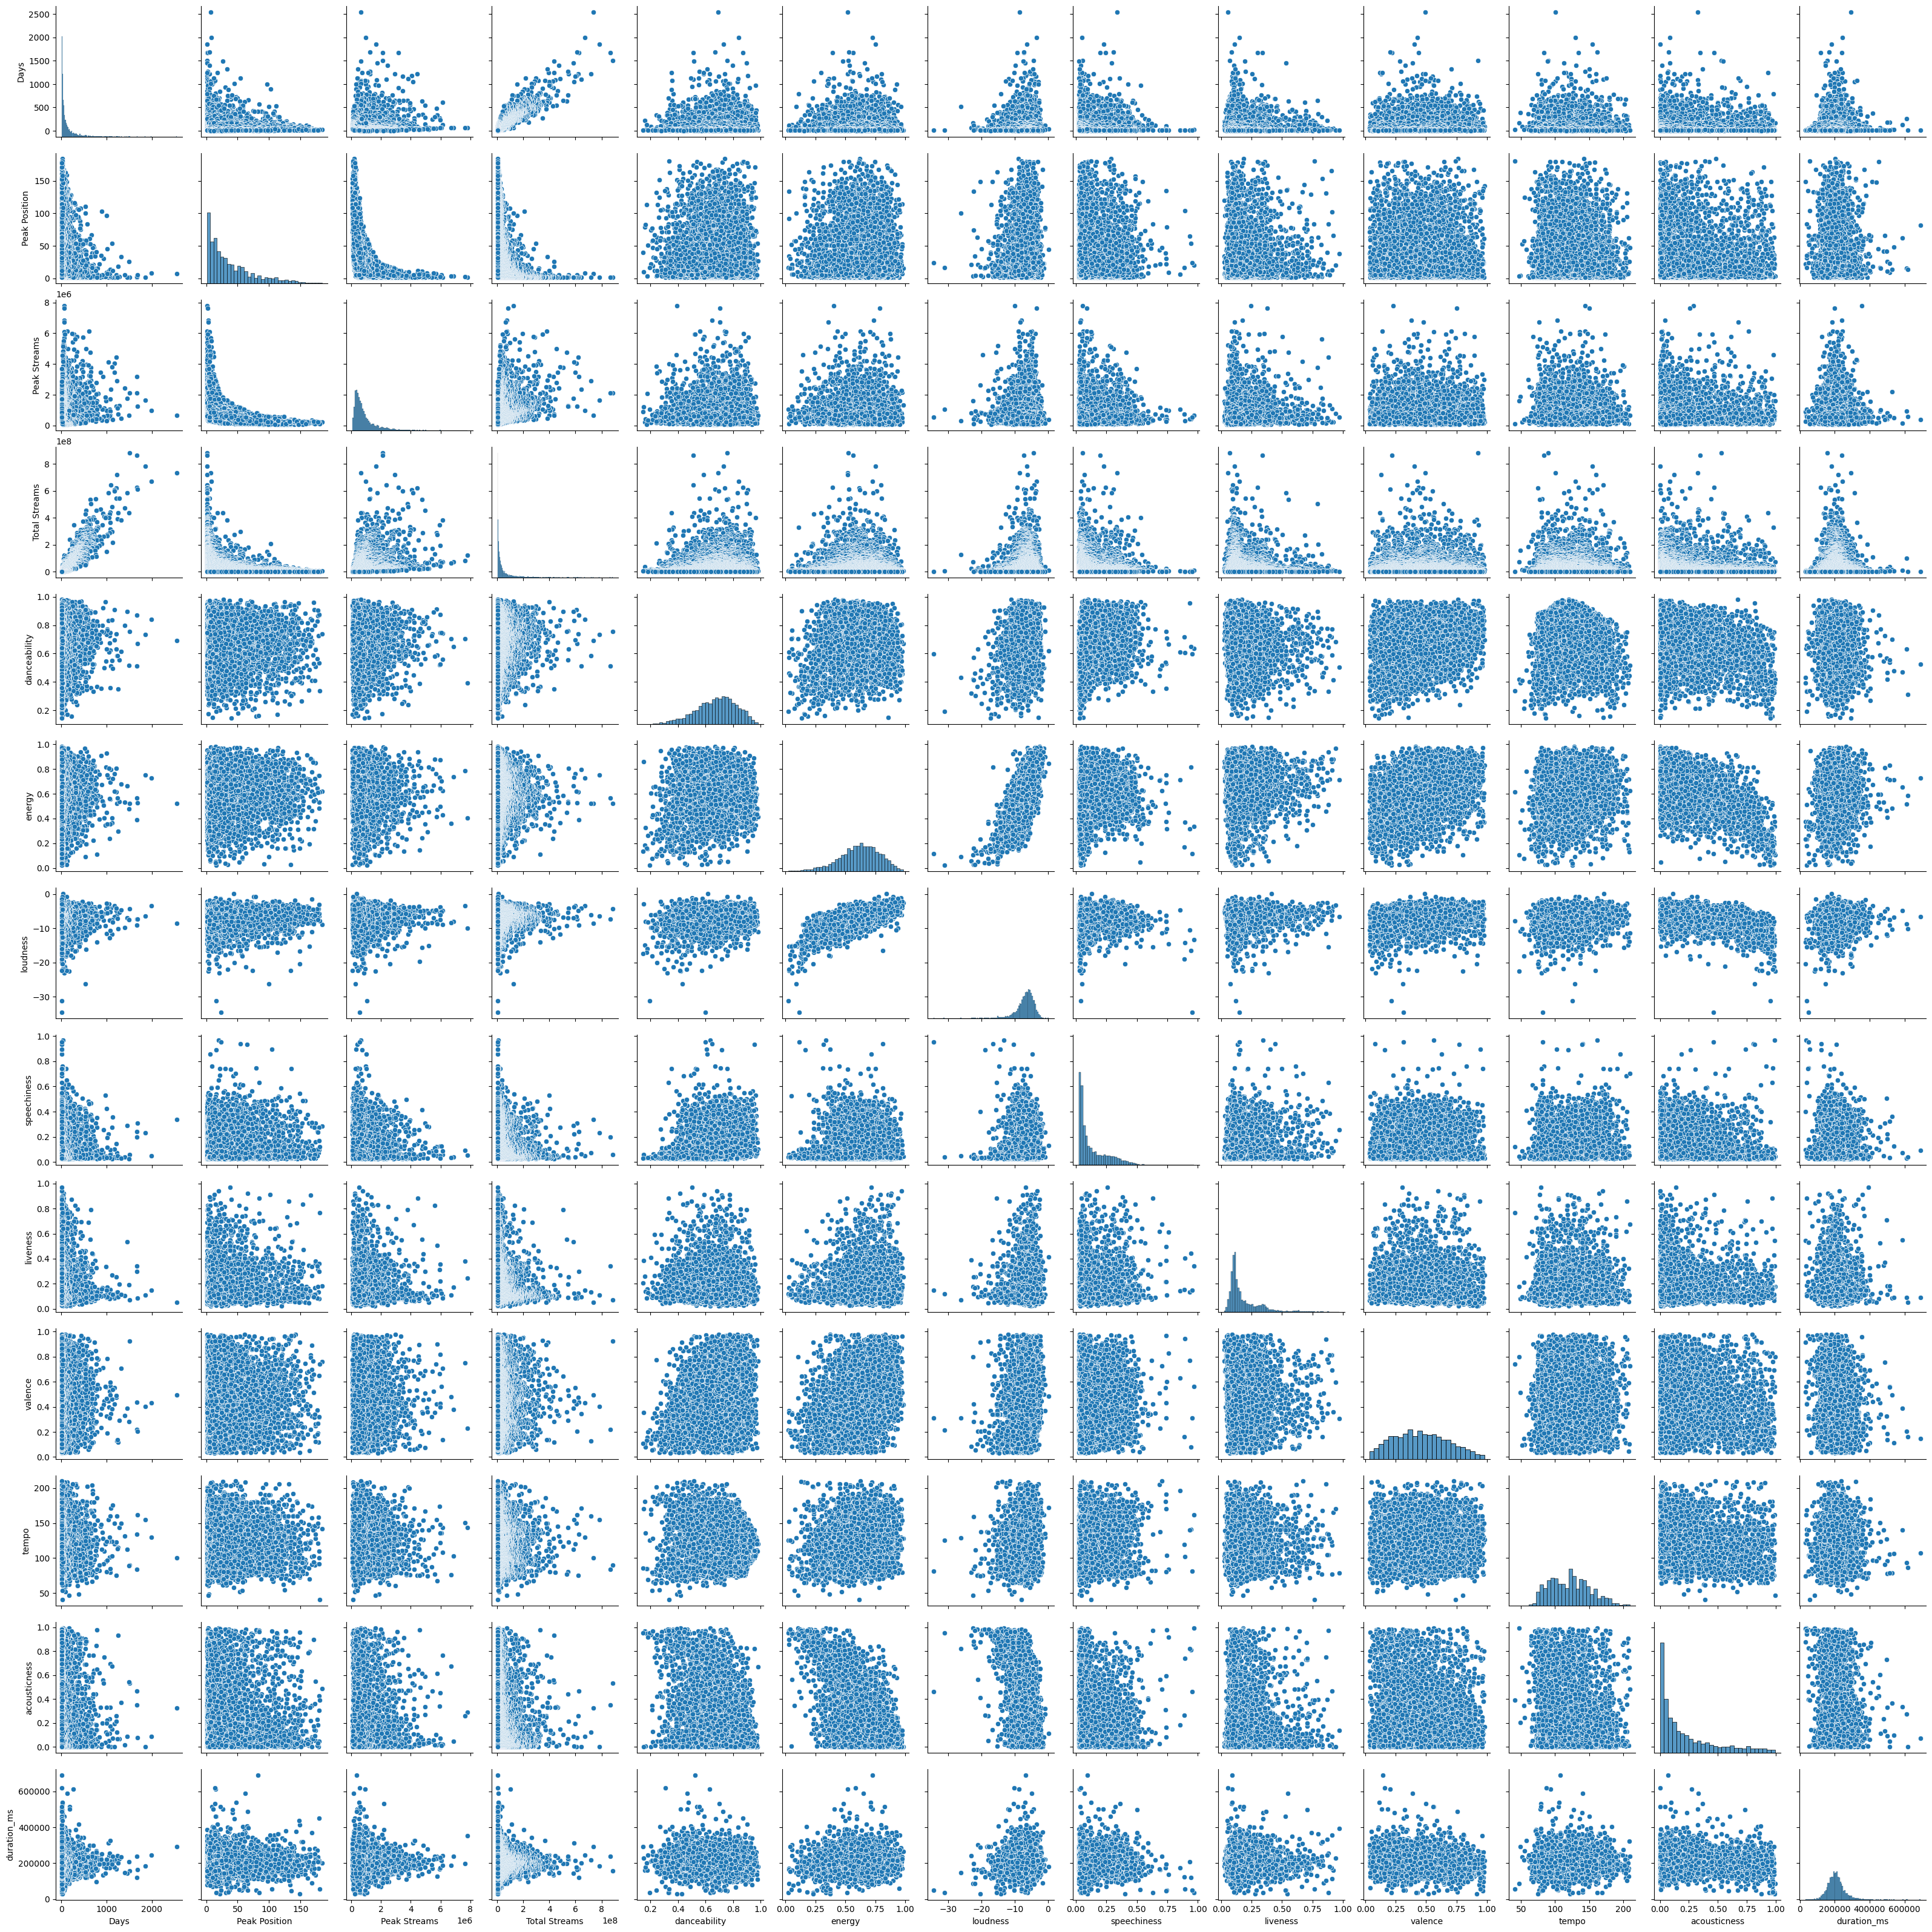

In [59]:
sns.pairplot(data=combined,
             vars=['Days', 'Peak Position', 'Peak Streams', 'Total Streams','danceability','energy','loudness','speechiness','liveness',
                   'valence','tempo','acousticness', 'duration_ms'])
plt.show()

In [60]:
!pip3 install -U scikit-learn scipy matplotlib
from sklearn.model_selection import train_test_split
np.random.seed(42)

train_set, test_set = train_test_split(combined, test_size=0.2, random_state=42)


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [61]:
music = train_set[['Days','Top 10 (xTimes)', 'Peak Position', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
music_labels = train_set["Total Streams"].copy()
music_test = test_set[['Days','Top 10 (xTimes)', 'Peak Position', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
music_labels_test = test_set["Total Streams"].copy()

In [62]:
music_labels

3569      5932469
679      78568531
2719     11307345
1731     25091594
2461     13738125
          ...    
4427      3163560
466     110819424
3093      8537072
3773      5096204
860      61001749
Name: Total Streams, Length: 3908, dtype: int64

In [63]:
music.head()

Days  Top 10 (xTimes)  Peak Position  danceability  energy  loudness  \
3569    18              0.0             20         0.849   0.480    -5.835   
679    213              5.0              6         0.393   0.858    -2.868   
2719    44              0.0             84         0.812   0.736    -5.421   
1731    88              0.0             57         0.637   0.690    -4.057   
2461    26              0.0             14         0.848   0.663    -5.606   

      speechiness  acousticness instrumentalness  liveness  valence    tempo  \
3569       0.2260       0.61200            0.269    0.2950    0.677  142.021   
679        0.0729       0.00359                0    0.1020    0.560  176.042   
2719       0.0833       0.15200          0.00254    0.0914    0.396   91.993   
1731       0.0405       0.00786                0    0.1240    0.457  129.857   
2461       0.2450       0.52300                0    0.1080    0.333  133.993   

      duration_ms  
3569     158463.0  
679      228360.0  
2719     193806.0  
1731     162399.0  
2461     255413.0

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [65]:
from sklearn.compose import ColumnTransformer

num_attribs = list(music)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

music_prepared = full_pipeline.fit_transform(music)
music_prepared_test = full_pipeline.fit_transform(music_test)


In [66]:
music_prepared

array([[-0.54911433, -0.26460559, -0.51345572, ...,  1.01344939,
         0.70275597, -0.93570133],
       [ 0.55777704, -0.03820137, -0.8878585 , ...,  0.47722643,
         1.85912771,  0.4108741 ],
       [-0.40152882, -0.26460559,  1.19809985, ..., -0.27440234,
        -0.99769275, -0.25481352],
       ...,
       [-0.48099794, -0.26460559,  0.04814845, ...,  0.51389125,
        -0.72257817, -0.19628603],
       [-0.5718198 , -0.26460559, -0.48671267, ..., -0.51272366,
         0.58311138,  2.3414915 ],
       [ 0.43289699, -0.26460559,  0.18186373, ...,  0.4268123 ,
        -0.01276626,  0.40072137]])

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(music_prepared, music_labels)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error

music_predictions = lin_reg.predict(music_prepared)
lin_mse = mean_squared_error(music_labels, music_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20248447.34719885

In [69]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [70]:
music_test_predictions = lin_reg.predict(music_prepared_test)

In [71]:
from sklearn.model_selection import cross_validate
result = cross_validate(lin_reg, music_test_predictions.reshape(-1,1), music_labels_test, scoring='neg_root_mean_squared_error', cv=10)

display_scores(-result['test_score'])

Scores: [28375447.68758206 23502556.89457948 26629666.99002757 24034558.32585382
 22004688.43804946 30154119.9887476  27438478.74324429 21602998.24488286
 17503465.96763116 18099376.40547431]
Mean: 23934535.76860726
Standard deviation: 4033745.2447476056


In [72]:
-np.mean(result['test_score']), np.std(result['test_score'])

(23934535.76860726, 4033745.2447476056)

### Agglomerative Clustering

In [73]:
top500 = combined[0:500]
top500.head()

level_0  index_x  Position    Artist Name  \
0        0        0         1   Post Malone    
1        1        1         2    Juice WRLD    
2        2        2         3  Lil Uzi Vert    
3        3        3         4       J. Cole    
4        4        4         5   Post Malone    

                                    Song Name  Days  Top 10 (xTimes)  \
0  Sunflower  SpiderMan: Into the SpiderVerse  1506            302.0   
1                                Lucid Dreams  1673            178.0   
2                               XO TOUR Llif3  1853            212.0   
3                              No Role Modelz  2547              6.0   
4                                    rockstar  1223            186.0   

   Peak Position Peak Position (xTimes)  Peak Streams  ...  valence    tempo  \
0              1                  (x29)       2118242  ...    0.925   89.960   
1              1                  (x20)       2127668  ...    0.218   83.903   
2              1                   (x4)       1660502  ...    0.401  155.096   
3              7                      0        659366  ...    0.494  100.028   
4              1                 (x124)       2905678  ...    0.129  159.801   

   duration_ms  time_signature acousticness            type  \
0     157560.0               4      0.53300  audio_features   
1     239836.0               4      0.34900  audio_features   
2     182707.0               4      0.00264  audio_features   
3     292799.0               4      0.32400  audio_features   
4     218147.0               4      0.12400  audio_features   

                       id                                   uri  \
0  0RiRZpuVRbi7oqRdSMwhQY  spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1  285pBltuF7vW8TeWk8hdRR  spotify:track:285pBltuF7vW8TeWk8hdRR   
2  7GX5flRQZVHRAGd6B4TmDO  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3  68Dni7IE4VyPkTOH9mRWHr  spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4  0e7ipj03S05BNilyu5bRzt  spotify:track:0e7ipj03S05BNilyu5bRzt   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1  https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2  https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3  https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4  https://api.spotify.com/v1/tracks/0e7ipj03S05B...   

                                        analysis_url  
0  https://api.spotify.com/v1/audio-analysis/0RiR...  
1  https://api.spotify.com/v1/audio-analysis/285p...  
2  https://api.spotify.com/v1/audio-analysis/7GX5...  
3  https://api.spotify.com/v1/audio-analysis/68Dn...  
4  https://api.spotify.com/v1/audio-analysis/0e7i...  

[5 rows x 30 columns]

In [74]:
music = top500[[ 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'Artist Name', 'Song Name']]

In [75]:
music1 = music.sample(n=75, random_state=37)

In [76]:
songAndArtist = music1[['Artist Name','Song Name']].copy()

In [77]:
songAndArtist.reset_index(inplace=True)

In [78]:
songAndArtist.drop(columns=['index'], inplace=True)

In [79]:
X = music1.drop(['Song Name', 'Artist Name'],axis=1)
y = music1[['Artist Name']].copy()

In [80]:
X.reset_index(inplace=True)
X.drop(columns=['index'], inplace=True)

In [81]:
y.reset_index(inplace=True)
y.drop(columns=['index'], inplace=True)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering

pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=13)),
    ('cluster', AgglomerativeClustering(n_clusters=3) ),
]) 

In [83]:
y_pred = pipe.fit_predict(X)

In [84]:
pd.concat([y, pd.DataFrame(y_pred)], axis=1)

Artist Name  0
0             Khalid   2
1      Morgan Wallen   2
2          Lil Skies   1
3      Ariana Grande   1
4        Tame Impala   1
..                ... ..
70        The Weeknd   2
71       Post Malone   0
72  The Chainsmokers   1
73        Bruno Mars   2
74        Ed Sheeran   2

[75 rows x 2 columns]

In [85]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.21442338, 0.15855918, 0.12828493, 0.10818811, 0.09746642])

In [86]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.7069220329373644

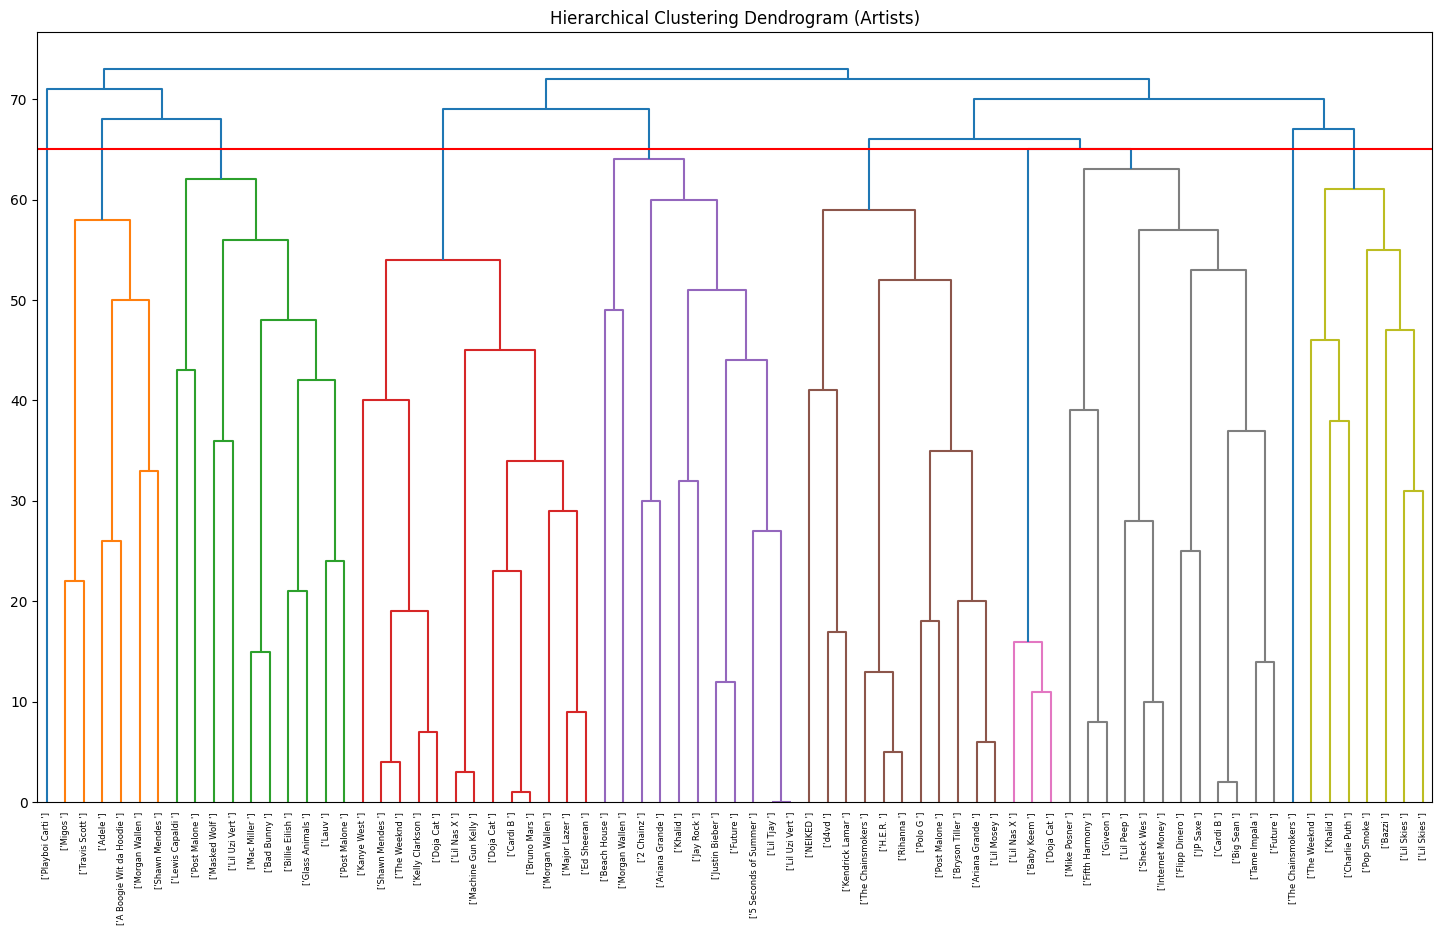

In [87]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    threshold = kwargs.pop('color_threshold',None)
    if threshold is not None:
        plt.axhline(threshold,color='red')


plt.figure(figsize=(18,10))
plt.title('Hierarchical Clustering Dendrogram (Artists)')

plot_dendrogram(pipe,labels=y.values,color_threshold=65)

plt.xticks(rotation=90)
plt.show()

In [88]:
y_pred

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 2])

In [89]:
clustered = pd.concat([X, pd.DataFrame(y_pred,columns=["cluster"])], axis=1)
clustered.head()

danceability  energy  loudness  speechiness  acousticness instrumentalness  \
0         0.838   0.771    -3.791       0.2440        0.0117                0   
1         0.818   0.803    -4.282       0.0797        0.0340                0   
2         0.682   0.683    -6.444       0.0287        0.1560         0.000023   
3         0.714   0.472    -7.375       0.0864        0.0130         0.000005   
4         0.756   0.674    -6.518       0.0959        0.0184                0   

   liveness  valence    tempo  duration_ms  cluster  
0    0.0853    0.405  175.957     245387.0        2  
1    0.1530    0.632  106.970     225983.0        2  
2    0.2730    0.640  120.023     178000.0        1  
3    0.2660    0.238  131.121     156943.0        1  
4    0.1580    0.389  111.995     251467.0        1

In [90]:
songAndAristClusters = pd.concat([clustered, songAndArtist], axis=1)

In [91]:
songAndAristClusters[songAndAristClusters['cluster'] == 0][['Artist Name','Song Name']]

Artist Name               Song Name
9               Mac Miller                The Spins
12           Playboi Carti                 Magnolia
18           Morgan Wallen            Wasted On You
21                   Migos               MotorSport
24                   Adele               Easy On Me
37             Masked Wolf   Astronaut In The Ocean
39           Billie Eilish               ocean eyes
40            Shawn Mendes         Treat You Better
43            Travis Scott                 YOSEMITE
47           Glass Animals               Heat Waves
48               Bad Bunny                 Yonaguni
51  A Boogie Wit da Hoodie          Look Back At It
53                    Lauv         I Like Me Better
58            Lil Uzi Vert            You Was Right
59           Lewis Capaldi        Someone You Loved
67             Post Malone                   Psycho
71             Post Malone                  Go Flex

In [92]:
songAndAristClusters[songAndAristClusters['cluster'] == 1][['Artist Name','Song Name']]

Artist Name                                   Song Name
2          Lil Skies                                         Lust
3      Ariana Grande                               God is a woman
4        Tame Impala                   The Less I Know The Better
5             Khalid                                    Love Lies
6             H.E.R.                                    Best Part
7          Lil Skies                                    Red Roses
10         Baby Keem                                  family ties
13      Charlie Puth                                    Attention
14          Lil Peep                    Falling Down  Bonus Track
16      Flipp Dinero                               Leave Me Alone
17         Pop Smoke                                         Dior
19           Cardi B                                           Up
22            NEIKED   Better Days (NEIKED x Mae Muller x Polo G)
26              d4vd                            Romantic Homicide
28         Sheck Wes                                     Mo Bamba
30     Bryson Tiller                                        Don't
31       Mike Posner           I Took A Pill In Ibiza  Seeb Remix
33    Kendrick Lamar                                         DNA.
35            Future                                   WAIT FOR U
36           Rihanna                                    Needed Me
38        The Weeknd                                  Die For You
41     Fifth Harmony                               Work from Home
42           JP Saxe                      If The World Was Ending
44            Polo G                                Martin & Gina
49  The Chainsmokers                                        Roses
50             Bazzi                                         Mine
52          Big Sean                                  Bounce Back
54         Lil Mosey                              Blueberry Faygo
55    Internet Money                                     Lemonade
57         Lil Nas X                                       Panini
60       Post Malone                                         Wow.
63          Doja Cat                            Get Into It (Yuh)
64            Giveon                       HEARTBREAK ANNIVERSARY
72  The Chainsmokers                                        Paris

In [93]:
songAndAristClusters[songAndAristClusters['cluster'] == 2][['Artist Name','Song Name']]

Artist Name             Song Name
0                Khalid                   Talk
1         Morgan Wallen       Sand In My Boots
8             Lil Nas X          Old Town Road
11              Cardi B          Bartier Cardi
15          Beach House             Space Song
20             Doja Cat                  Woman
23        Justin Bieber          Love Yourself
25             Lil Tjay                    F.N
27               Future           Life Is Good
29             2 Chainz            It's A Vibe
32         Shawn Mendes    If I Can't Have You
34         Lil Uzi Vert          XO TOUR Llif3
45  5 Seconds of Summer             Youngblood
46    Machine Gun Kelly    my ex's best friend
56          Major Lazer             Cold Water
61       Kelly Clarkson    Underneath the Tree
62             Jay Rock            King's Dead
65        Ariana Grande   no tears left to cry
66             Doja Cat           Kiss Me More
68           Kanye West                Bound 2
69        Morgan Wallen              7 Summers
70           The Weeknd       I Feel It Coming
73           Bruno Mars     That's What I Like
74           Ed Sheeran                Shivers

In [94]:
clustered.groupby('cluster').mean(numeric_only=True).T

cluster                   0              1              2
danceability       0.619412       0.733912       0.739250
energy             0.550588       0.561971       0.737750
loudness          -7.140765      -6.797265      -4.961958
speechiness        0.089588       0.146326       0.175050
acousticness       0.472706       0.130155       0.069725
liveness           0.113976       0.212891       0.130200
valence            0.510647       0.346765       0.609583
tempo            136.895412     114.492912     130.802750
duration_ms   207512.294118  207328.147059  209262.750000

### Classification of Being in Top 10 or Not

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [96]:
spotifyDFCopy = combined.copy()

In [97]:
spotifyDFCopy['Peak Position'].describe()

count    4885.000000
mean       39.049130
std        37.347967
min         1.000000
25%        10.000000
50%        26.000000
75%        56.000000
max       184.000000
Name: Peak Position, dtype: float64

In [98]:
spotifyDFCopy['MadeTop10'] = spotifyDFCopy['Peak Position'].apply(lambda x: 1 if x <= 10 else 0)

In [99]:
spotifyDFCopy['duration_ms'] = spotifyDFCopy['duration_ms'].astype(float)

In [100]:
spotifyDFCopy.head()

level_0  index_x  Position    Artist Name  \
0        0        0         1   Post Malone    
1        1        1         2    Juice WRLD    
2        2        2         3  Lil Uzi Vert    
3        3        3         4       J. Cole    
4        4        4         5   Post Malone    

                                    Song Name  Days  Top 10 (xTimes)  \
0  Sunflower  SpiderMan: Into the SpiderVerse  1506            302.0   
1                                Lucid Dreams  1673            178.0   
2                               XO TOUR Llif3  1853            212.0   
3                              No Role Modelz  2547              6.0   
4                                    rockstar  1223            186.0   

   Peak Position Peak Position (xTimes)  Peak Streams  ...    tempo  \
0              1                  (x29)       2118242  ...   89.960   
1              1                  (x20)       2127668  ...   83.903   
2              1                   (x4)       1660502  ...  155.096   
3              7                      0        659366  ...  100.028   
4              1                 (x124)       2905678  ...  159.801   

   duration_ms  time_signature  acousticness            type  \
0     157560.0               4       0.53300  audio_features   
1     239836.0               4       0.34900  audio_features   
2     182707.0               4       0.00264  audio_features   
3     292799.0               4       0.32400  audio_features   
4     218147.0               4       0.12400  audio_features   

                       id                                   uri  \
0  0RiRZpuVRbi7oqRdSMwhQY  spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1  285pBltuF7vW8TeWk8hdRR  spotify:track:285pBltuF7vW8TeWk8hdRR   
2  7GX5flRQZVHRAGd6B4TmDO  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3  68Dni7IE4VyPkTOH9mRWHr  spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4  0e7ipj03S05BNilyu5bRzt  spotify:track:0e7ipj03S05BNilyu5bRzt   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1  https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2  https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3  https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4  https://api.spotify.com/v1/tracks/0e7ipj03S05B...   

                                        analysis_url  MadeTop10  
0  https://api.spotify.com/v1/audio-analysis/0RiR...          1  
1  https://api.spotify.com/v1/audio-analysis/285p...          1  
2  https://api.spotify.com/v1/audio-analysis/7GX5...          1  
3  https://api.spotify.com/v1/audio-analysis/68Dn...          1  
4  https://api.spotify.com/v1/audio-analysis/0e7i...          1  

[5 rows x 31 columns]

In [101]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(spotifyDFCopy, test_size=0.2, random_state=42)

In [102]:
music_train = train_set.drop(columns=['level_0', 'Top 10 (xTimes)', 'Peak Position', 'Position','Days','Artist Name','Song Name','Peak Position (xTimes)', 'MadeTop10'])
music_test = test_set.drop(columns=['Top 10 (xTimes)', 'Peak Position','level_0', 'Position','Days','Artist Name','Song Name','Peak Position (xTimes)', 'MadeTop10'])
music_train_labels = train_set["MadeTop10"].copy()
music_test_labels = test_set["MadeTop10"].copy()

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [104]:
music_train = music_train.select_dtypes(['number'])
music_test = music_test.select_dtypes(['number'])

In [105]:
music_train.head()

index_x  Peak Streams  Total Streams  index_y  danceability  energy  \
3569     3569        683389        5932469        0         0.849   0.480   
679       679       2438681       78568531        0         0.393   0.858   
2719     2719        314885       11307345        0         0.812   0.736   
1731     1731        422483       25091594        0         0.637   0.690   
2461     2461       2062968       13738125        0         0.848   0.663   

      loudness  speechiness  liveness  valence    tempo  duration_ms  \
3569    -5.835       0.2260    0.2950    0.677  142.021     158463.0   
679     -2.868       0.0729    0.1020    0.560  176.042     228360.0   
2719    -5.421       0.0833    0.0914    0.396   91.993     193806.0   
1731    -4.057       0.0405    0.1240    0.457  129.857     162399.0   
2461    -5.606       0.2450    0.1080    0.333  133.993     255413.0   

      acousticness  
3569       0.61200  
679        0.00359  
2719       0.15200  
1731       0.00786  
2461       0.52300

In [106]:
music_train_no_streams = music_train.drop(columns=['Peak Streams','Total Streams'])
music_test_no_streams = music_test.drop(columns=['Peak Streams','Total Streams'])

In [107]:
music_train_only_streams = music_train[['Peak Streams','Total Streams']]
music_test_only_streams = music_test[['Peak Streams','Total Streams']]

In [108]:
from sklearn.compose import ColumnTransformer


num_attribs = list(music_train.select_dtypes(['number']))
num_attribs_no_streams = list(music_train_no_streams.select_dtypes(['number']))
num_attribs_only_streams = list(music_train_only_streams.select_dtypes(['number']))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

full_pipeline_no_streams = ColumnTransformer([
        ("num", num_pipeline, num_attribs_no_streams),
    ])
full_pipeline_only_streams = ColumnTransformer([("num", num_pipeline, num_attribs_only_streams),
    ])

music_train_prepared = full_pipeline.fit_transform(music_train)
music_test_prepared = full_pipeline.fit_transform(music_test)
music_train_no_streams_prepared = full_pipeline_no_streams.fit_transform(music_train_no_streams)
music_test_no_streams_prepared = full_pipeline_no_streams.fit_transform(music_test_no_streams)
music_train_only_streams_prepared = full_pipeline_only_streams.fit_transform(music_train_only_streams)
music_test_only_streams_prepared = full_pipeline_only_streams.fit_transform(music_test_only_streams)

In [109]:
music_train_prepared

array([[ 0.79695376, -0.24171249, -0.46835947, ...,  0.70275597,
        -0.93570133,  1.52243493],
       [-1.26880746,  1.90968598,  0.53904499, ...,  1.85912771,
         0.4108741 , -0.89429657],
       [ 0.18937693, -0.69337463, -0.39381421, ..., -0.99769275,
        -0.25481352, -0.30478108],
       ...,
       [ 0.45671074, -0.40242893, -0.4322357 , ..., -0.72257817,
        -0.19628603,  0.51349392],
       [ 0.9427722 , -0.22080388, -0.47995781, ...,  0.58311138,
         2.3414915 , -0.32861433],
       [-1.13942933, -0.44035588,  0.29540769, ..., -0.01276626,
         0.40072137, -0.26505899]])

In [110]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    ]

In [111]:
X_train = music_train_prepared
X_train_no_streams = music_train_no_streams_prepared
y_train = music_train_labels
X_test = music_test_prepared
X_test_no_streams = music_test_no_streams_prepared
y_test = music_test_labels
X_test_only_streams = music_test_only_streams_prepared
X_train_only_streams = music_train_only_streams_prepared

In [112]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Accuracy: 85.47%
Linear SVM Accuracy: 87.62%
RBF SVM Accuracy: 74.41%
Decision Tree Accuracy: 88.23%
Random Forest Accuracy: 83.93%
Neural Net Accuracy: 89.66%
AdaBoost Accuracy: 87.82%
Naive Bayes Accuracy: 86.08%


In [113]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train_no_streams, y_train)
    y_pred = clf.predict(X_test_no_streams)
    
    # evaluate predictions
    accuracy = clf.score(X_test_no_streams, y_test)
    print("%s No Streams Included Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors No Streams Included Accuracy: 71.44%
Linear SVM No Streams Included Accuracy: 74.31%
RBF SVM No Streams Included Accuracy: 74.62%
Decision Tree No Streams Included Accuracy: 78.20%
Random Forest No Streams Included Accuracy: 76.46%
Neural Net No Streams Included Accuracy: 80.66%
AdaBoost No Streams Included Accuracy: 80.25%
Naive Bayes No Streams Included Accuracy: 79.02%


In [114]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train_only_streams, y_train)
    y_pred = clf.predict(X_test_only_streams)
    
    # evaluate predictions
    accuracy = clf.score(X_test_only_streams, y_test)
    print("%s Only Streams (no Audio Features) Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Only Streams (no Audio Features) Accuracy: 86.80%
Linear SVM Only Streams (no Audio Features) Accuracy: 87.00%
RBF SVM Only Streams (no Audio Features) Accuracy: 89.56%
Decision Tree Only Streams (no Audio Features) Accuracy: 88.84%
Random Forest Only Streams (no Audio Features) Accuracy: 89.87%
Neural Net Only Streams (no Audio Features) Accuracy: 89.56%
AdaBoost Only Streams (no Audio Features) Accuracy: 89.05%
Naive Bayes Only Streams (no Audio Features) Accuracy: 86.49%


In [115]:
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=5, 
    min_samples_split=2)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

# evaluate predictions

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = dt.score(X_test, y_test)
print("Decision Tree Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"Decision Tree F1 score: {f1}")

Decision Tree Accuracy: 88.74%
Decision Tree F1 score: 0.8872626953633712


In [116]:
dt_no_streams = DecisionTreeClassifier(random_state=3, 
    criterion='gini',
    splitter='best', 
    max_depth=8, 
    min_samples_split=2)
dt_no_streams.fit(X_train_no_streams,y_train)

y_pred = dt_no_streams.predict(X_test_no_streams)

# evaluate predictions
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = dt_no_streams.score(X_test_no_streams, y_test)
print("No Streams Included Decision Tree Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"No Streams Included Decision Tree F1 Score: {f1}")

No Streams Included Decision Tree Accuracy: 78.20%
No Streams Included Decision Tree F1 Score: 0.750469004558751


In [117]:
neuralNet = MLPClassifier(alpha=1, max_iter=10000)
neuralNet.fit(X_train,y_train)

y_pred = neuralNet.predict(X_test)

# evaluate predictions
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = neuralNet.score(X_test, y_test)
print("Neural Net Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"Neural Net F1 Score: {f1}")

Neural Net Accuracy: 89.56%
Neural Net F1 Score: 0.8928290243650479


In [118]:
neuralNet_no_streams = MLPClassifier(alpha=0.005, learning_rate_init= 0.005, max_iter=10000)
neuralNet_no_streams.fit(X_train_no_streams,y_train)

y_pred = neuralNet_no_streams.predict(X_test_no_streams)

# evaluate predictions
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = neuralNet_no_streams.score(X_test_no_streams, y_test)
print("No Streams Included Neural Net Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"No Streams Included Neural Net F1 Score: {f1}")

No Streams Included Neural Net Accuracy: 75.23%
No Streams Included Neural Net F1 Score: 0.7312994876892417


## Data Visualization

In [119]:
top_100_songs = combined.head(100)
top_100_songs.columns

Index(['level_0', 'index_x', 'Position', 'Artist Name', 'Song Name', 'Days',
       'Top 10 (xTimes)', 'Peak Position', 'Peak Position (xTimes)',
       'Peak Streams', 'Total Streams', 'index_y', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'acousticness', 'type', 'id', 'uri', 'track_href', 'analysis_url'],
      dtype='object')

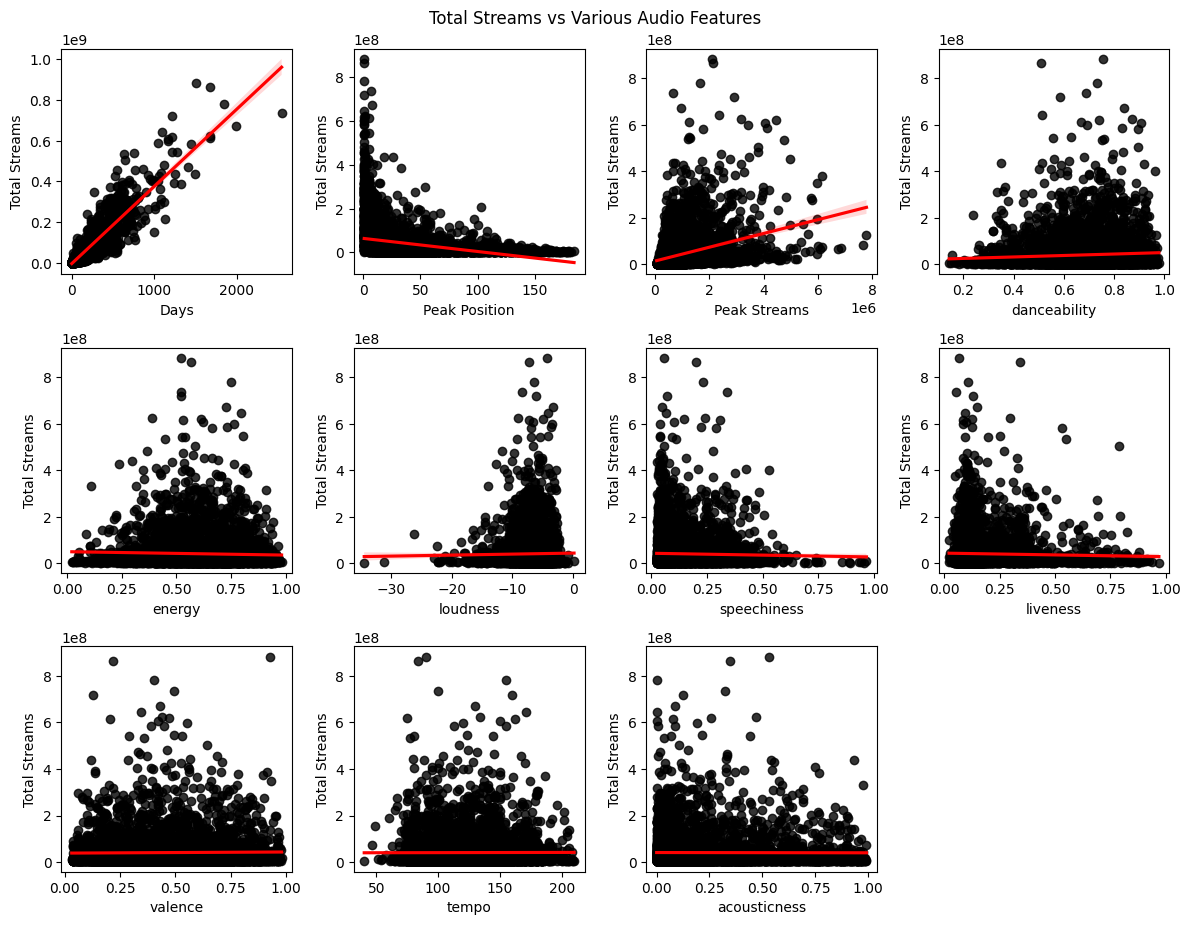

In [120]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

columns = ['Days', 'Peak Position', 'Peak Streams', 'danceability',
           'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'acousticness']

fig.suptitle('Total Streams vs Various Audio Features')

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        col = columns[i]
        sns.regplot(x=combined[col], y=combined['Total Streams'], ax=ax, scatter_kws={"color": "black"}, line_kws={"color": "red"})
        ax.set_xlabel(col)
        ax.set_ylabel('Total Streams')

for i in range(len(columns), len(axes.flat)):
    fig.delaxes(axes.flat[i])

fig.tight_layout()

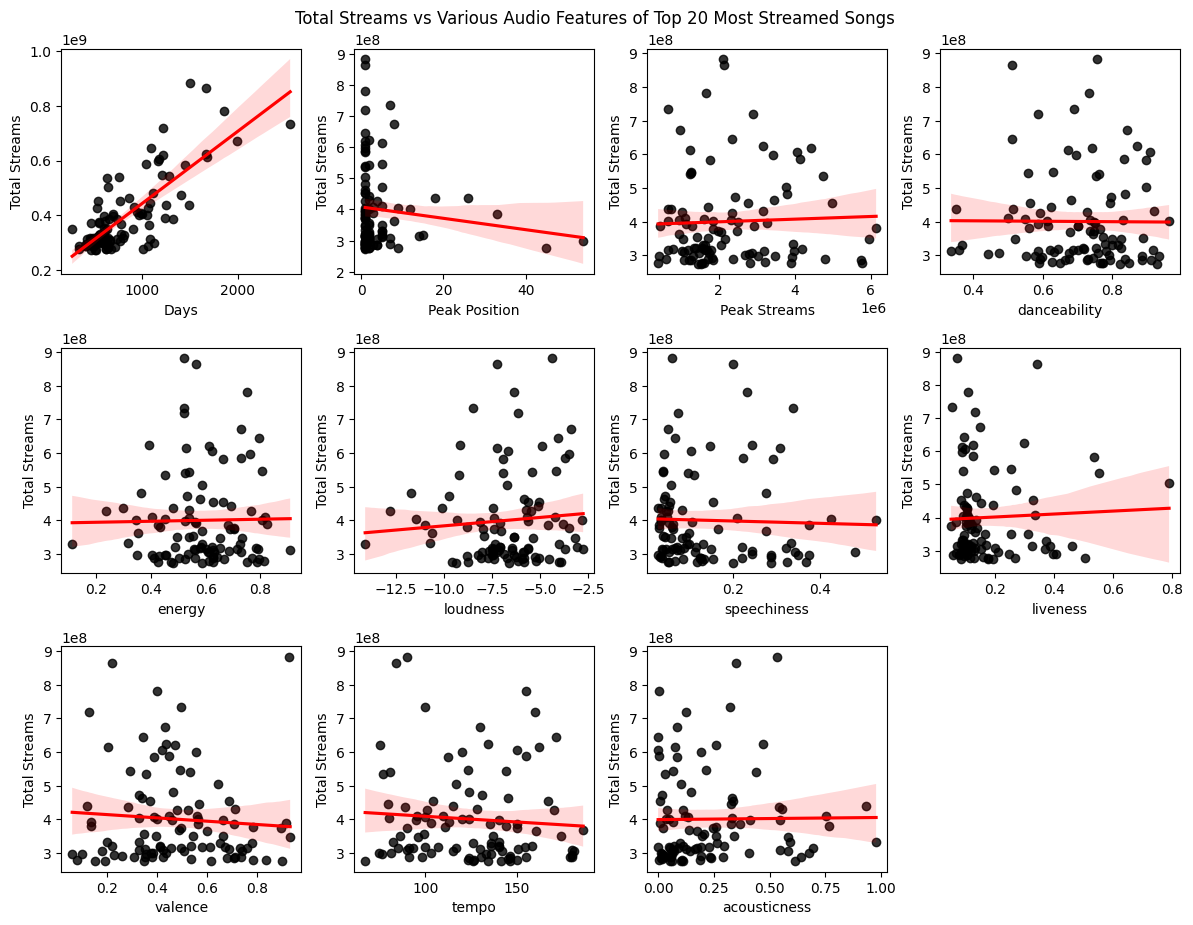

In [121]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

columns = ['Days', 'Peak Position', 'Peak Streams', 'danceability',
           'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'acousticness']

fig.suptitle('Total Streams vs Various Audio Features of Top 20 Most Streamed Songs')

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        col = columns[i]
        sns.regplot(x=top_100_songs[col], y=top_100_songs['Total Streams'], ax=ax, scatter_kws={"color": "black"}, line_kws={"color": "red"})
        ax.set_xlabel(col)
        ax.set_ylabel('Total Streams')


for i in range(len(columns), len(axes.flat)):
    fig.delaxes(axes.flat[i])


fig.tight_layout()

In [122]:
columns1 = ['Total Streams', 'Days', 'Peak Position', 'Peak Streams', 'danceability',
           'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'acousticness']

<Axes: >

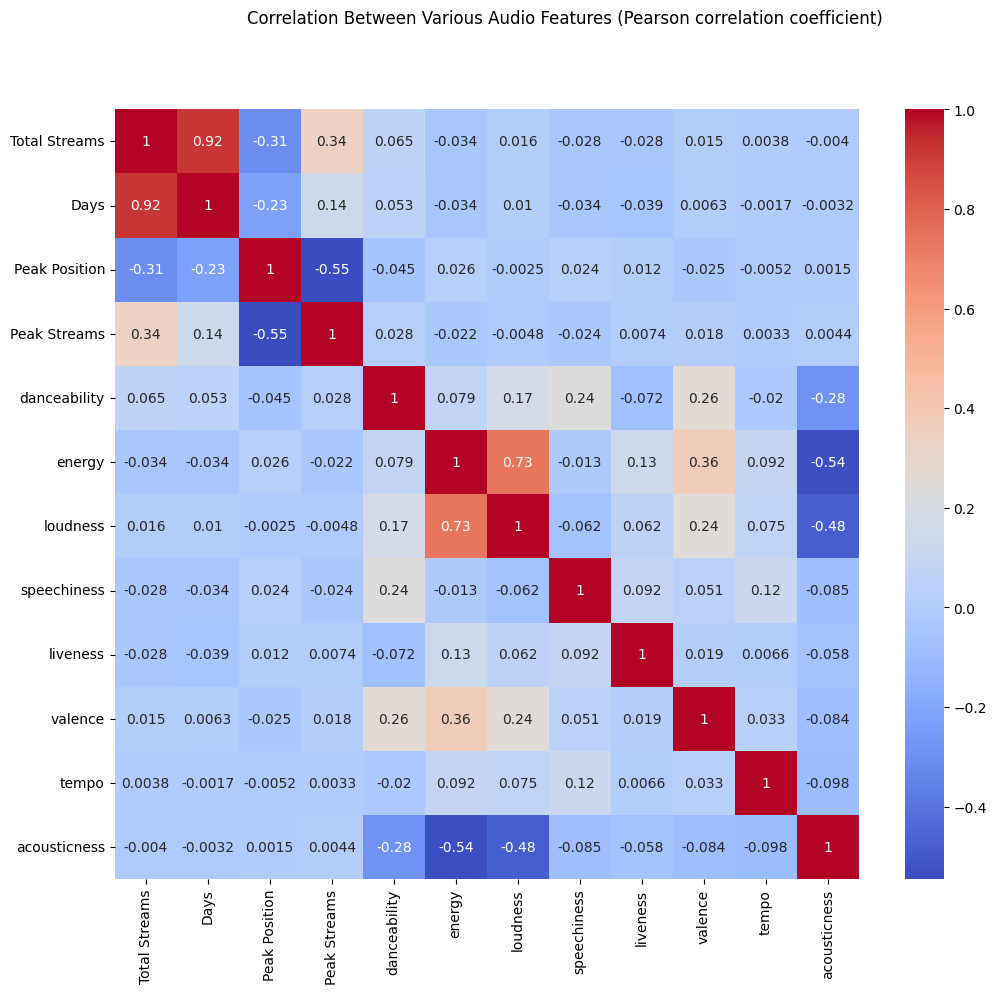

In [123]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.suptitle('Correlation Between Various Audio Features (Pearson correlation coefficient)')
sns.heatmap(combined[columns1].corr(), annot=True, cmap="coolwarm", ax=ax)

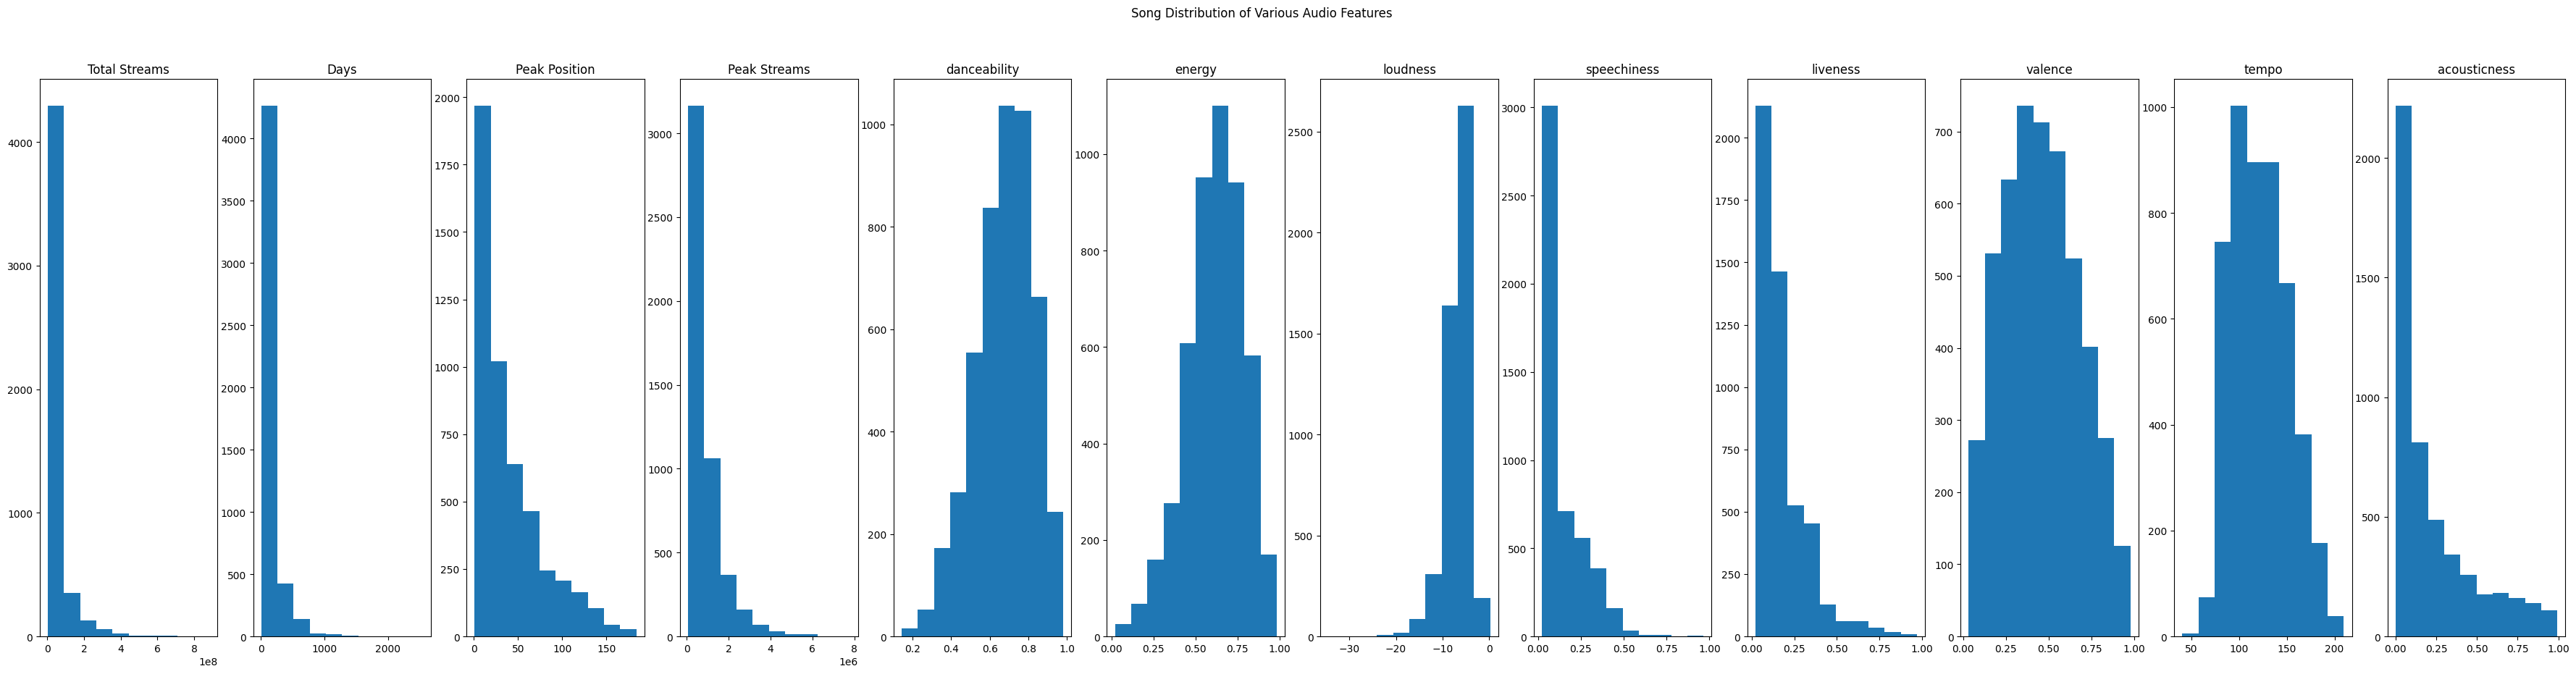

In [124]:
data = combined[columns1]

fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(45,10))
fig.suptitle('Song Distribution of Various Audio Features')
for i, column in enumerate(data.columns):
    axes[i].hist(data[column])
    axes[i].set_title(column)
plt.show()

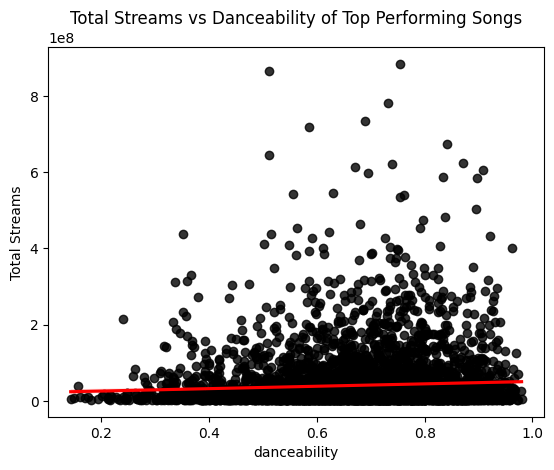

In [125]:
sns.regplot(x='danceability', y='Total Streams', data=combined, color='r', scatter_kws={"color": "black"})
plt.title('Total Streams vs Danceability of Top Performing Songs')
plt.show()

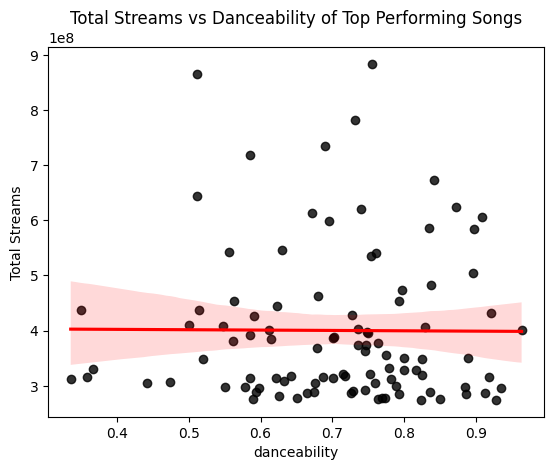

In [126]:
sns.regplot(x='danceability', y='Total Streams', data=top_100_songs, color='r', scatter_kws={"color": "black"})
plt.title('Total Streams vs Danceability of Top Performing Songs')
plt.show()

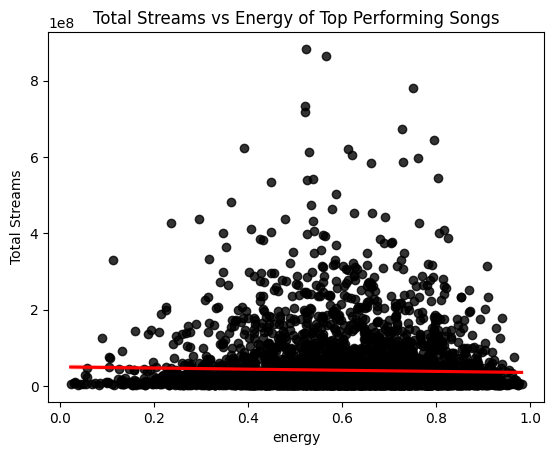

In [127]:
sns.regplot(x='energy', y='Total Streams', data=combined, color='r', scatter_kws={"color": "black"})
plt.title('Total Streams vs Energy of Top Performing Songs')
plt.show()

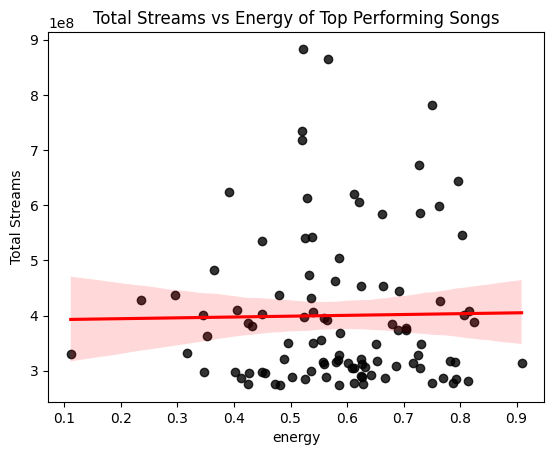

In [128]:
sns.regplot(x='energy', y='Total Streams', data=top_100_songs, color='r', scatter_kws={"color": "black"})
plt.title('Total Streams vs Energy of Top Performing Songs')
plt.show()

In [129]:
top_20_songs = combined.head(20)

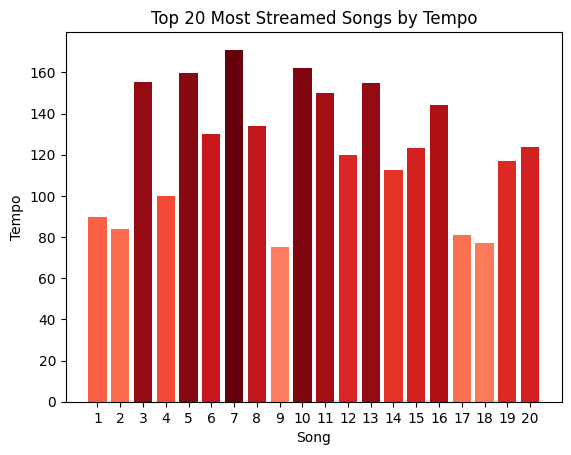

In [130]:
colormap = plt.cm.get_cmap('Reds')
colors = np.array(top_20_songs['tempo'])
colorlist = colormap(colors/max(colors))

plt.bar(top_20_songs['Position'], top_20_songs['tempo'], color=colorlist)
plt.xticks(top_20_songs['Position'])
plt.xlabel('Song')
plt.ylabel('Tempo')
plt.title('Top 20 Most Streamed Songs by Tempo')
plt.show()

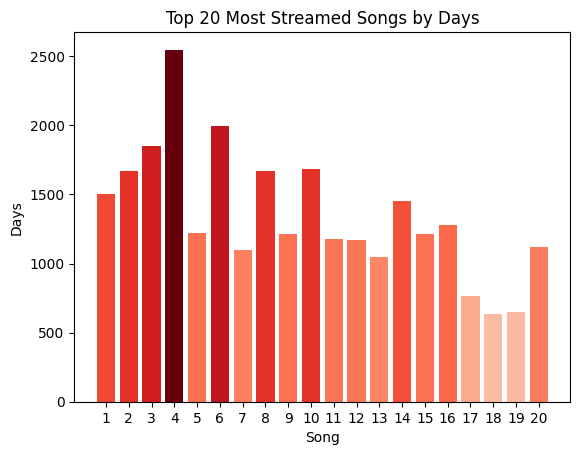

In [131]:
colormap = plt.cm.get_cmap('Reds')
colors = np.array(top_20_songs['Days'])
colorlist = colormap(colors/max(colors))

plt.bar(top_20_songs['Position'], top_20_songs['Days'], color=colorlist)
plt.xticks(top_20_songs['Position'])
plt.xlabel('Song')
plt.ylabel('Days')
plt.title('Top 20 Most Streamed Songs by Days')
plt.show()

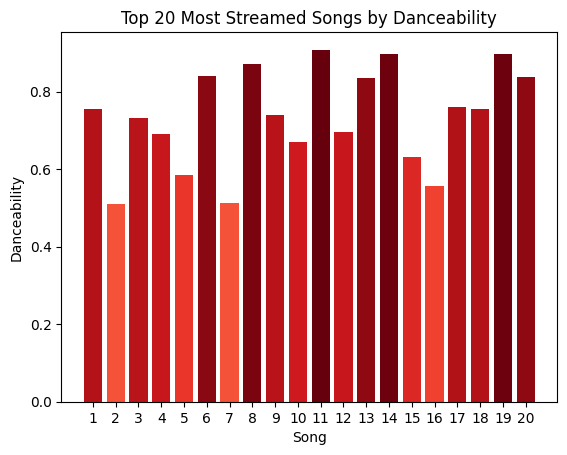

In [132]:
colormap = plt.cm.get_cmap('Reds')
colors = np.array(top_20_songs['danceability'])
colorlist = colormap(colors/max(colors))

plt.bar(top_20_songs['Position'], top_20_songs['danceability'], color=colorlist)
plt.xticks(top_20_songs['Position'])
plt.xlabel('Song')
plt.ylabel('Danceability')
plt.title('Top 20 Most Streamed Songs by Danceability')
plt.show()